In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)  #Entradas
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)  #Salidas

In [3]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),     # Adam saber como ajustar pesos y sesgos, para que aprenda
    loss='mean_squared_error'                    # perdida,
)

In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) #Entrada Celcius, Salida Farenheit, entrenamiento 1000, False no salga basura
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


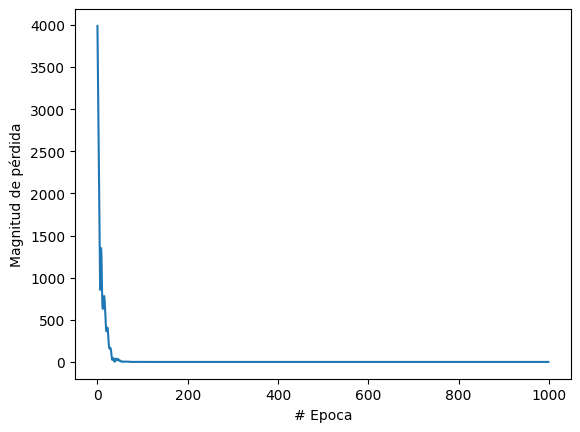

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
El resultado es [[211.74744]] fahrenheit!


In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 0.19255681, -0.54704547,  0.05177851]], dtype=float32), array([ 3.024621 , -3.7279534, -1.661673 ], dtype=float32)]
[array([[ 0.84092695,  1.1598694 , -0.46323654],
       [-1.0678982 , -0.36181813,  1.0597842 ],
       [-0.6709836 ,  0.11280136, -0.10529828]], dtype=float32), array([ 3.7038507,  3.6772666, -2.7489269], dtype=float32)]
[array([[ 1.168595 ],
       [ 1.2148216],
       [-0.6639625]], dtype=float32), array([3.2943146], dtype=float32)]
